# Spirals Classification

Classify two spirals generated with the library SyntheticDatasets, using NNJulia.

### Imports

In [1]:
# Import external librairies to generate dataset and plot
using SyntheticDatasets
using Plots

# Import NNJulia
using NNJulia

### Load dataset

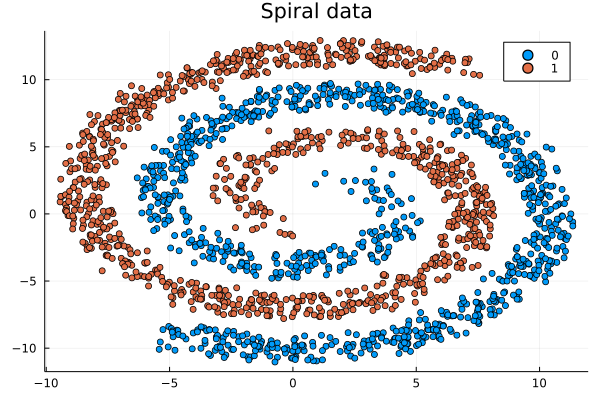

In [2]:
# load dataset
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);


# plot dataset
scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [3]:
# extract inputs and labels from the dataset
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
yData = permutedims(spirals.label) #1x2000

# split the dataset into train and test sets
x_train,y_train,x_test,y_test = split_train_test(xData,yData,0.9);

### Create the model 

In [4]:
model = Sequential(
        Dense(2, 16, leakyrelu),
        Dense(16, 16, leakyrelu),
        Dense(16, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 16, Activation = leakyrelu
Dense: 16 --> 16, Activation = leakyrelu
Dense: 16 --> 1, Activation = sigmoid


### Train the model

Initialise the parameters used for the training phase :

In [6]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.1)
loss = BinaryCrossentropy()
metrics = BinaryAccuracy(0.8)

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 100;

Load the train data into a dataloader that will split the data into shuffled batches :

In [7]:
trainData = DataLoader(x_train, y_train, batchsize,true);

Train the model :

In [8]:
history = train!(model, trainParams, trainData, nbEpochs)

Epoch 1 : accuracy = 0.5705818965517241, loss = 38.27508714855783
Epoch 2 : accuracy = 0.5818965517241379, loss = 19.07662096237415
Epoch 3 : accuracy = 0.6023706896551724, loss = 17.823016371380948
Epoch 4 : accuracy = 0.5953663793103449, loss = 17.43055627744636
Epoch 5 : accuracy = 0.6120689655172413, loss = 17.353962013848342
Epoch 6 : accuracy = 0.6142241379310345, loss = 16.798251874561092
Epoch 7 : accuracy = 0.6217672413793104, loss = 16.67757278659168
Epoch 8 : accuracy = 0.6126077586206896, loss = 16.37532905636188
Epoch 9 : accuracy = 0.6158405172413793, loss = 16.084209839899234
Epoch 10 : accuracy = 0.6287715517241379, loss = 16.048253075253502
Epoch 11 : accuracy = 0.619073275862069, loss = 15.773386520524824
Epoch 12 : accuracy = 0.6255387931034483, loss = 15.607190832705179
Epoch 13 : accuracy = 0.6395474137931034, loss = 14.992775116349668
Epoch 14 : accuracy = 0.6330818965517241, loss = 14.826449747993822
Epoch 15 : accuracy = 0.6438577586206896, loss = 14.50723355299

Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.570582, 0.581897, 0.602371, 0.595366, 0.612069, 0.614224, 0.…
  "loss"     => [38.2751, 19.0766, 17.823, 17.4306, 17.354, 16.7983, 16.6776, 1…

### Plot accuracy and loss

Plot the evolution of the accuracy and the loss during the training phase:

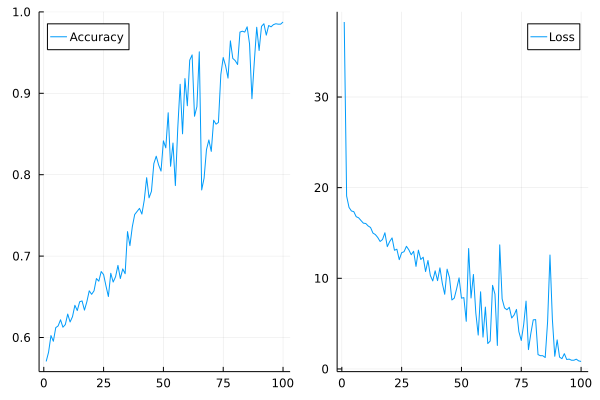

In [9]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

### Evaluate the model

In [12]:
acc = evaluate(model,metrics,x_test,y_test)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 100.0%


### Decision boundary

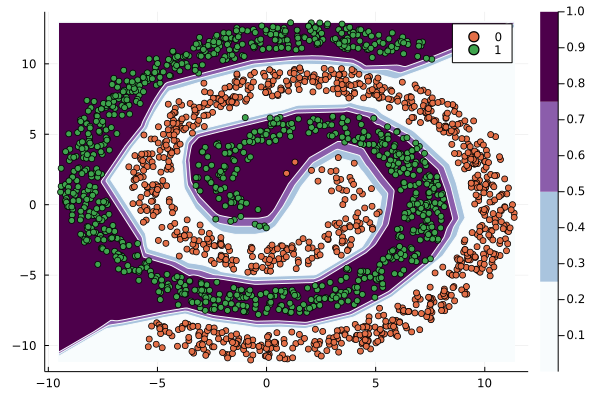

In [11]:
plot_decision_boundary(model,xData,yData)